### Load libraries

In [1]:
import geopandas as geopd
import pandas as pd

- `import geopandas as geopd`: This line imports the geopandas library and assigns it the alias `geopd`. GeoPandas is used to handle geospatial data in Python.
- `import pandas as pd`: This line imports the pandas library and assigns it the alias `pd`. Pandas is used for data manipulation and analysis.

### Load San Luis Potosi metropolitan area shape file  
Source: Marco Geoestadístico INEGI (2023).

#### URL: https://www.inegi.org.mx/temas/mg/ 

In [2]:
# INEGI data
gdf = geopd.read_file("../dataset/SLPMA/geometry/2023_1_24_A/2023_1_24_A.shp")

- `INEGI data`: This line indicates that the following code deals with data from INEGI (Instituto Nacional de Estadística y Geografía), Mexico's National Institute of Statistics and Geography.
- `gdf = geopd.read_file("../dataset/SLPMA/geometry/2023_1_24_A/2023_1_24_A.shp")`: This line reads a shapefile using GeoPandas. The file path points to the shapefile on the disk, which contains geographic data. The read file is stored in the variable gdf as a GeoDataFrame, which supports spatial operations.

### Display data frame entries

- `CVE_ENT`: The CVE_ENT is the state code provided by INEGI. This code is a numeric identifier assigned to each of the 32 states in Mexico. It is used to organize and retrieve state-level data efficiently, facilitating geographic and statistical analyses across different regions of the country.
- `CVE_MUN`: The CVE_MUN is the municipality code provided by INEGI. Each of the over 2,400 municipalities in Mexico is assigned a unique CVE_MUN code. This code helps in distinguishing and managing data specific to each municipality, ensuring precise data collection, analysis, and governance within the broader framework of state and national statistics.
- `CVE_LOC`: The CVE_LOC is the location code provided by INEGI. This code is used to identify specific localities within municipalities, such as towns, villages, or cities. It allows for detailed geographic and demographic analysis at a finer scale, enabling the study of population distribution, infrastructure, and services within different localities.
- `CVE_AGEB`: The CVE_AGEB (Área Geoestadística Básica) is the code for geographic areas provided by INEGI. These areas are the smallest statistical units used for census and survey purposes in Mexico. The CVE_AGEB code facilitates detailed geographic and demographic analysis, helping to understand population dynamics, socio-economic conditions, and spatial patterns within urban and rural settings.
- `AMBITO`: The AMBITO attribute indicates whether an area is urban or rural. This classification helps in distinguishing between densely populated urban areas and sparsely populated rural areas, which often have different socio-economic characteristics, infrastructure, and development needs. Understanding whether an area is urban or rural is crucial for planning and implementing public policies, resource allocation, and service delivery.
- `geometry`: The geometry attribute contains the boundary information of each municipality as defined by INEGI. This information is typically represented as polygons, which outline the geographic area of the municipality. These polygons are essential for spatial analyses, mapping, and visualizations, as they define the physical extents of each municipality. The geometry data is used in geographic information systems (GIS) to overlay different data layers, analyze spatial relationships, and create detailed maps for various applications.

In [3]:
display(gdf)

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,AMBITO,geometry
0,2400100010198,24,001,0001,0198,Urbana,"POLYGON ((-101.15796 22.39861, -101.15829 22.3..."
1,2400100010200,24,001,0001,0200,Urbana,"POLYGON ((-101.15675 22.39860, -101.15675 22.3..."
2,2400100010107,24,001,0001,0107,Urbana,"POLYGON ((-101.16092 22.40463, -101.16092 22.4..."
3,2400100010111,24,001,0001,0111,Urbana,"POLYGON ((-101.16742 22.40622, -101.16756 22.4..."
4,2400100010145,24,001,0001,0145,Urbana,"POLYGON ((-101.16331 22.40754, -101.16353 22.4..."
...,...,...,...,...,...,...,...
1577,2405800010237,24,058,0001,0237,Urbana,"POLYGON ((-99.30914 22.53072, -99.30760 22.528..."
1578,2405800010218,24,058,0001,0218,Urbana,"POLYGON ((-99.33210 22.54050, -99.33291 22.540..."
1579,2405800010148,24,058,0001,0148,Urbana,"POLYGON ((-99.32573 22.52434, -99.32573 22.524..."
1580,2405800010133,24,058,0001,0133,Urbana,"POLYGON ((-99.33050 22.53016, -99.33043 22.530..."


- `display(gdf)`: This line displays the GeoDataFrame gdf. In a Jupyter notebook, this will render the GeoDataFrame as a table, showing its contents and structure, including columns like CVE_ENT, CVE_MUN, and geometry.

### San Luis Potosi metropilitan area consist of two municipalities: San Luis Potosí and Soledad de Graciasno Sánchez (SGS).

The San Luis Potosí Metropolitan Area, a vital economic and cultural region in central Mexico, includes the municipalities of San Luis Potosí and Soledad de Graciano Sánchez. These municipalities form the core of the state's urban landscape, driving its growth and development.

San Luis Potosí, the state capital, is a historical city founded in 1592 during the Spanish colonial period. It has grown into a bustling urban center with a population of over one million residents. The city is renowned for its colonial architecture, vibrant cultural scene, and significant economic activities, including manufacturing, trade, and services. It serves as a central hub for education and industry, housing numerous universities, research institutions, and industrial parks. The city's strategic location, well-connected by major highways and railroads, makes it a key logistical and commercial node in the region.

Soledad de Graciano Sánchez, commonly referred to as Soledad or SGS, is a rapidly growing municipality adjacent to San Luis Potosí. It has a population of over 300,000 people and serves as an essential residential and industrial area complementing the state capital. The municipality has experienced significant urbanization and industrialization, attracting investments in various sectors such as manufacturing, logistics, and services. Its close proximity to San Luis Potosí facilitates the integration of economic activities, contributing to the overall development of the metropolitan area.

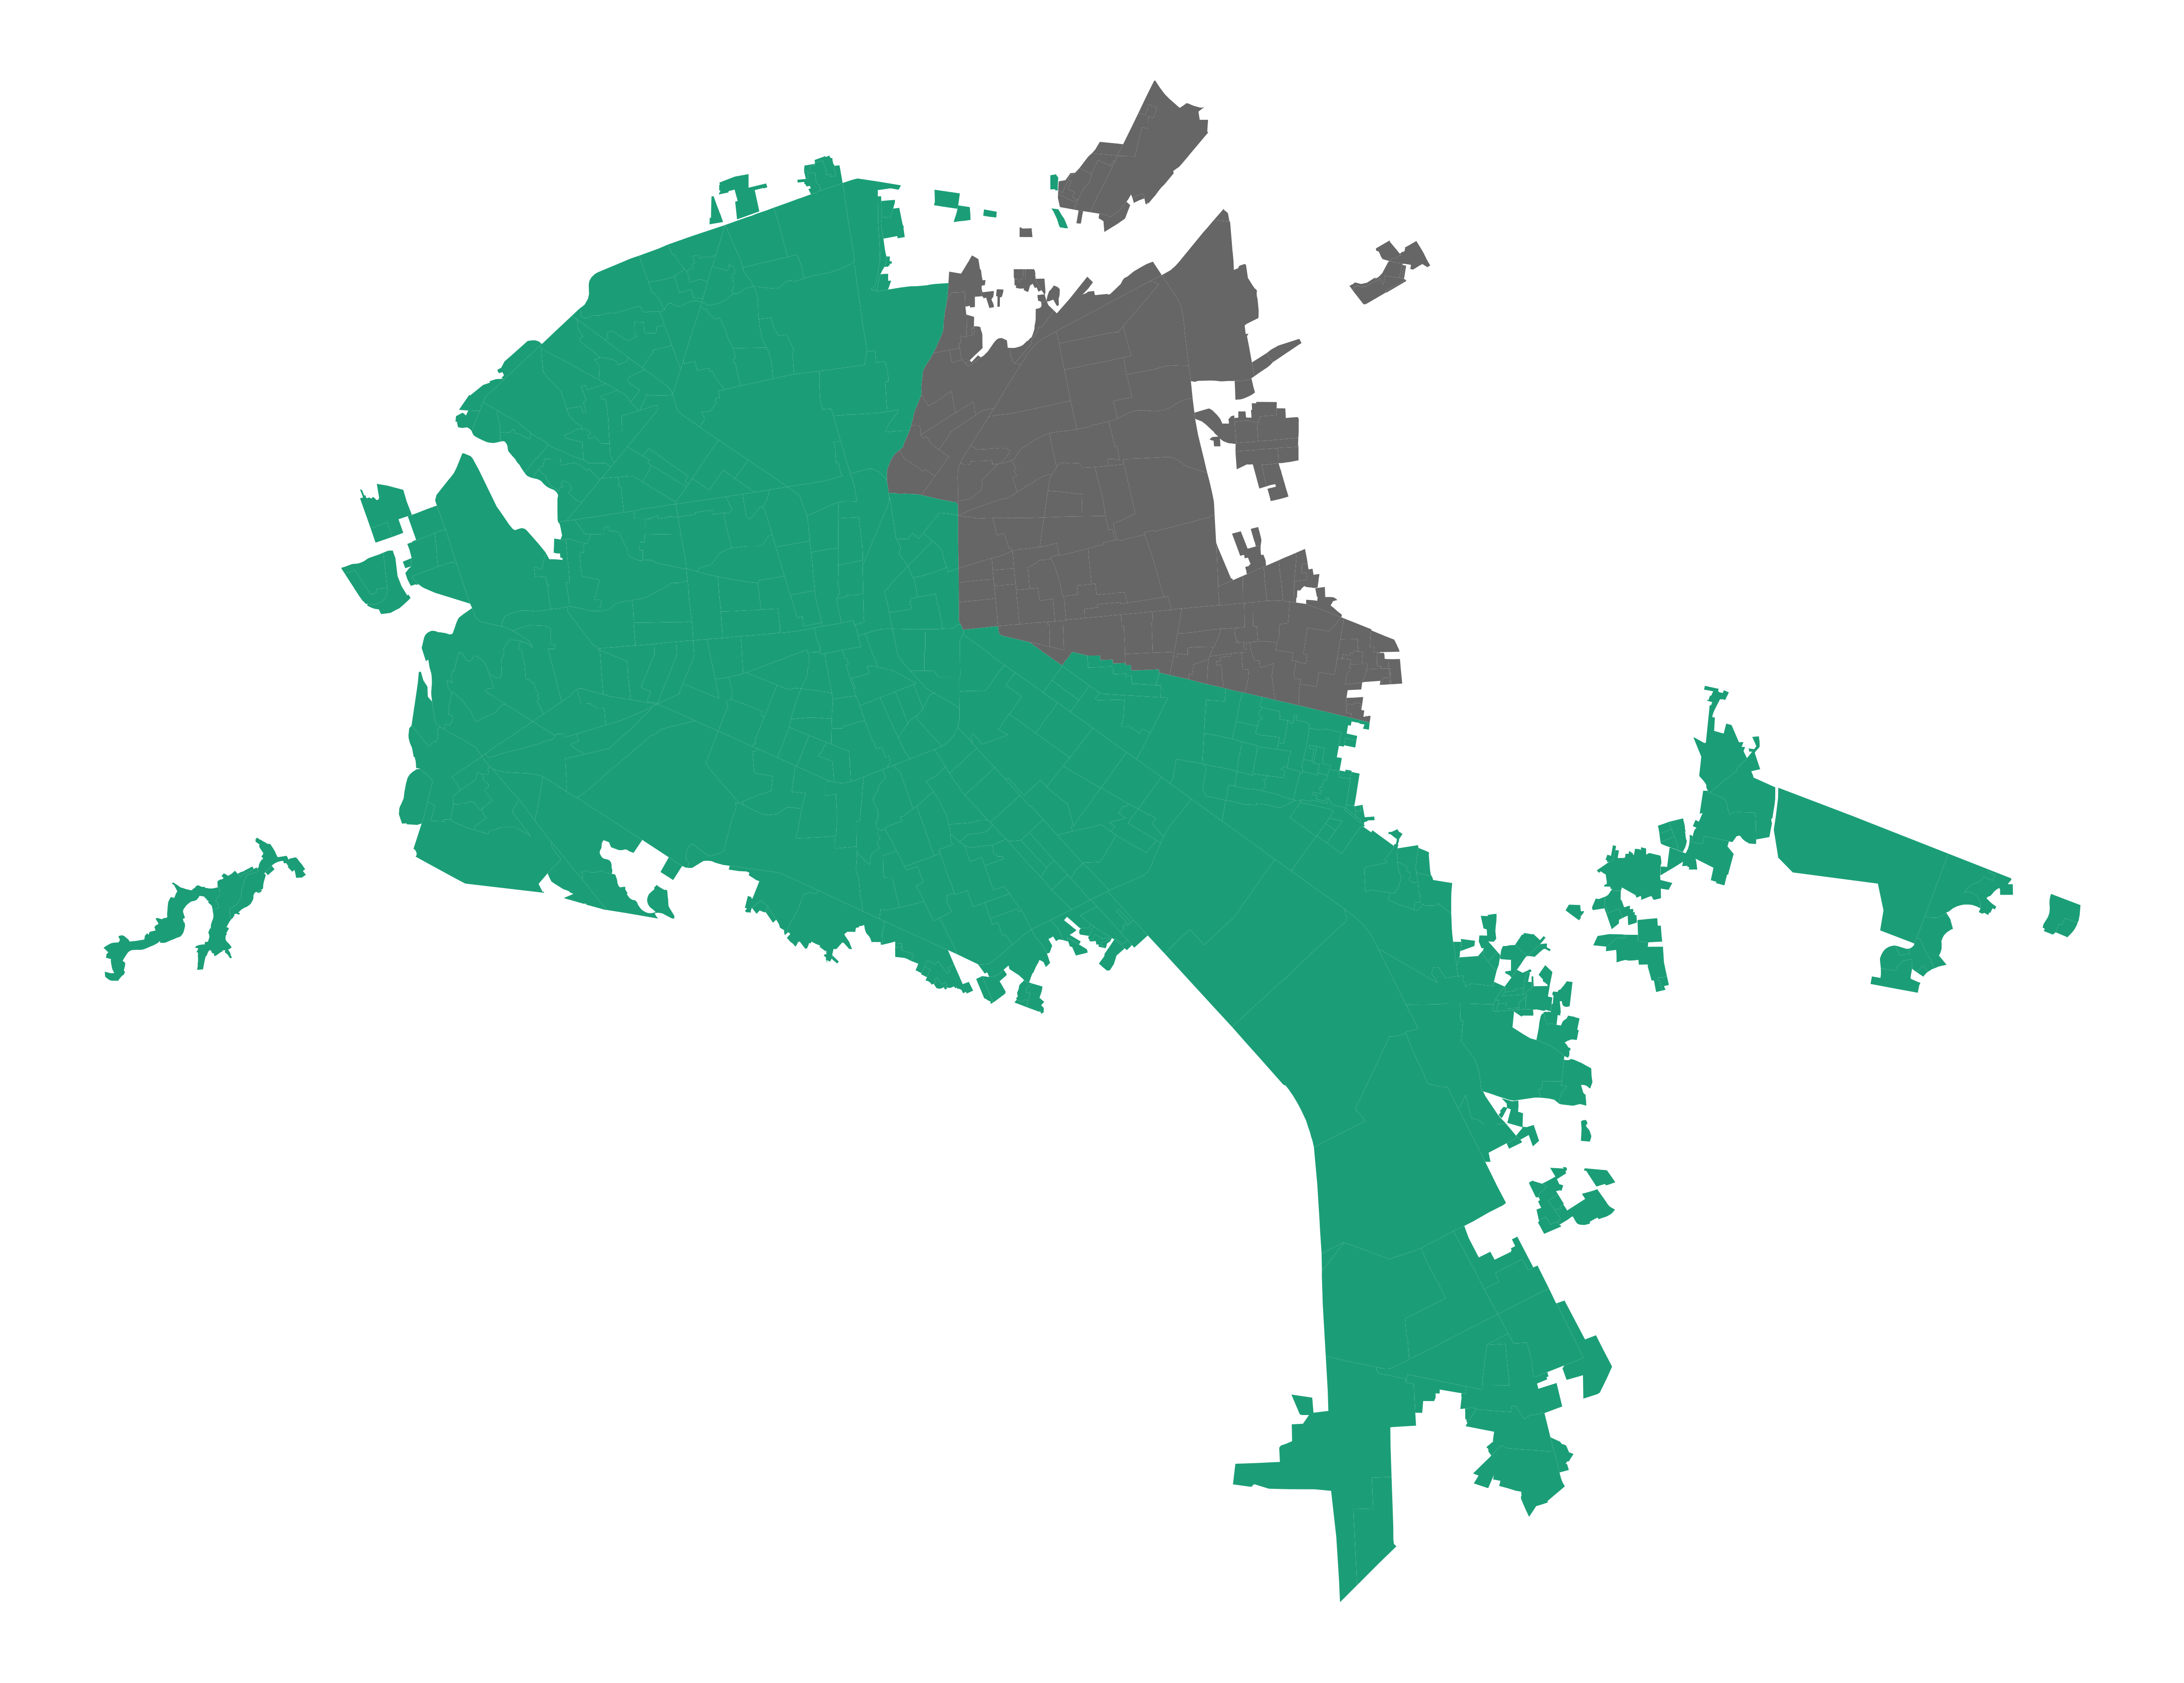

In [4]:
# SLPMA's map labeling each state by a color. 
# AGEBS are identified bya a CVE_ENT code

# SLP
gdf_slp = gdf[gdf["CVE_MUN"] == "028"]

#SGS
gdf_sgs = gdf[ gdf["CVE_MUN"] == "035"]

# Concatenate frames
frames = [gdf_slp, gdf_sgs ]
gdf_zmslp = pd.concat(frames)

# Plot SLP and SGS municipalities
ax = gdf_zmslp.plot(figsize = (60, 60),cmap='Dark2',column="CVE_MUN")
ax.set_axis_off()

- `gdf_slp = gdf[gdf["CVE_MUN"] == "028"]`: This line filters the GeoDataFrame gdf to include only the rows where the CVE_MUN (municipality code) is "028", which corresponds to San Luis Potosí. The filtered data is stored in gdf_slp.
- `gdf_sgs = gdf[gdf["CVE_MUN"] == "035"]`: This line filters the GeoDataFrame gdf to include only the rows where the CVE_MUN is "035", corresponding to Soledad de Graciano Sánchez. The filtered data is stored in gdf_sgs.

- `frames = [gdf_slp, gdf_sgs]`: This line creates a list of the two filtered GeoDataFrames, `gdf_slp` and `gdf_sgs`.
- `gdf_zmslp = pd.concat(frames)`: This line concatenates the list of GeoDataFrames into a single GeoDataFrame gdf_zmslp.

- `ax = gdf_zmslp.plot(figsize = (60, 60), cmap='Dark2', column="CVE_MUN")`: This line creates a plot of the combined GeoDataFrame gdf_zmslp. The figsize = (60, 60) parameter sets the size of the plot. The cmap='Dark2' parameter sets the color map to "Dark2". The column="CVE_MUN" parameter specifies that the municipalities should be colored according to their CVE_MUN code.
- `ax.set_axis_off()`: This line removes the axis from the plot for a cleaner visual representation.

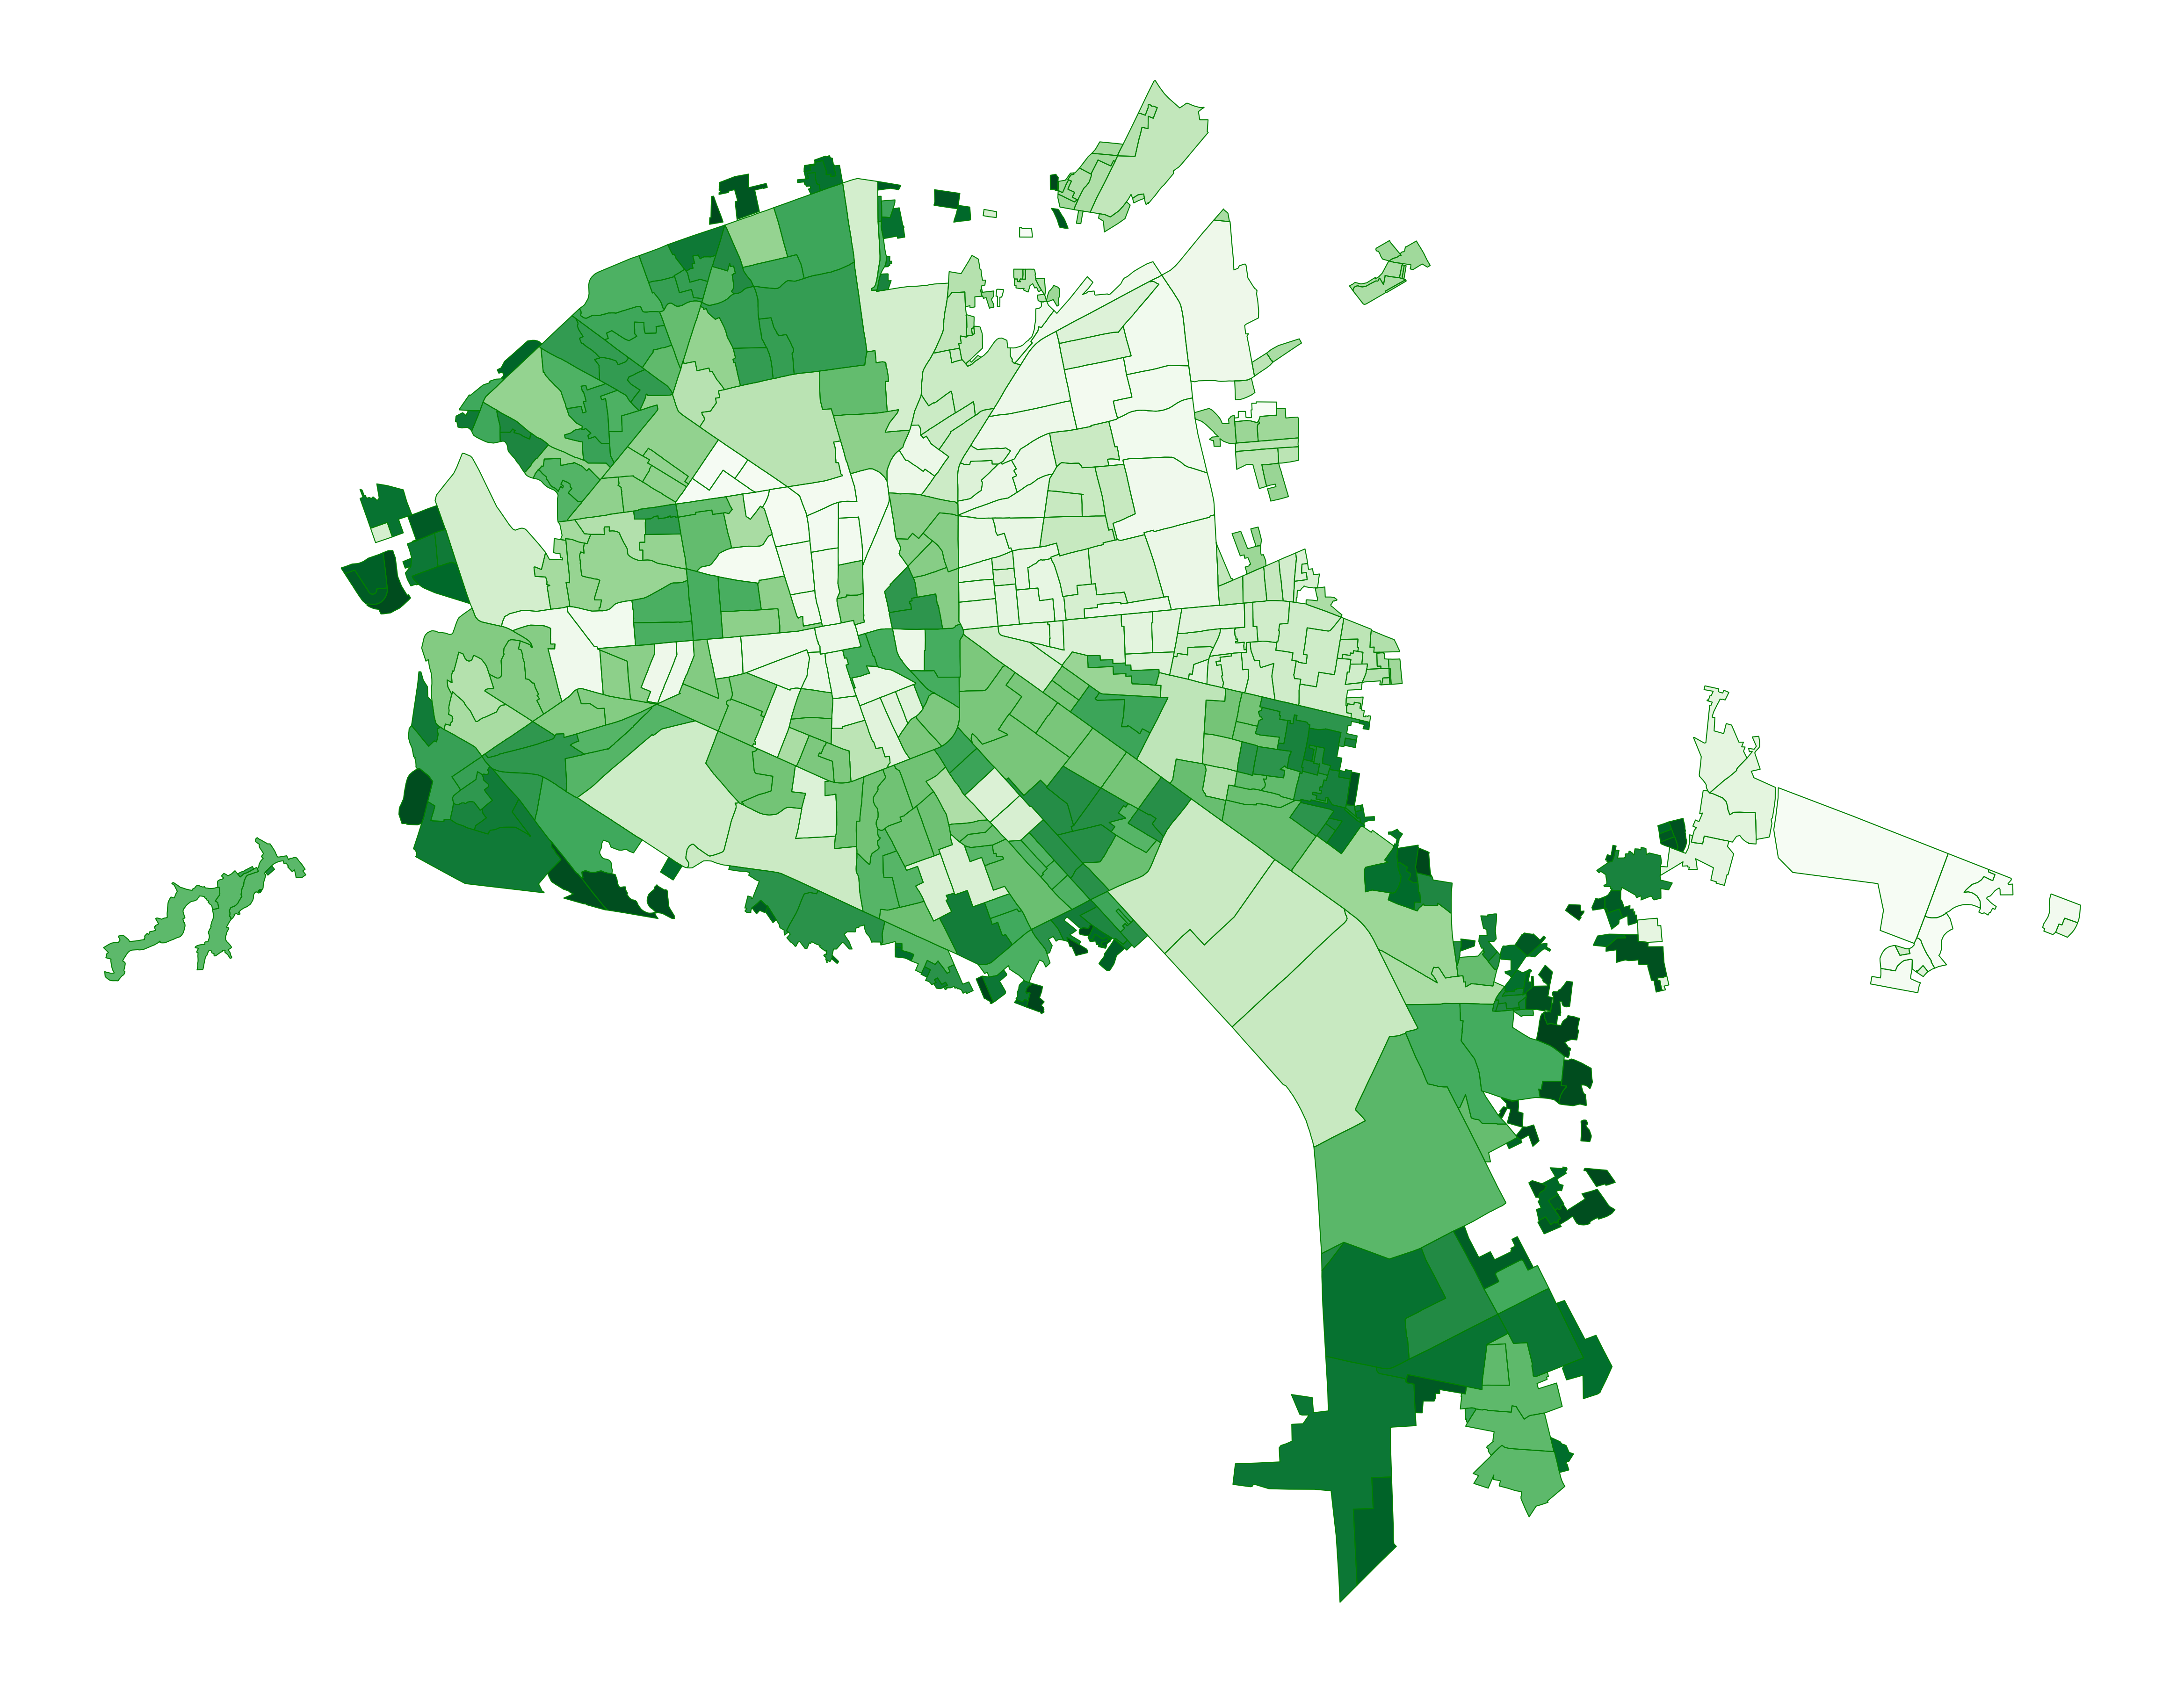

In [5]:
# Plot AGEBS
ax = gdf_zmslp.plot(figsize = (60, 60), column="CVE_AGEB", cmap = "Greens")
ax.set_axis_off()

# Include AGEB outlines.
gdf_zmslp.boundary.plot(ax=ax,figsize = (20, 20), edgecolor='green')
ax.set_axis_off()


- `ax = gdf_zmslp.plot(figsize = (60, 60), column="CVE_AGEB", cmap = "Greens")`: This line creates a plot of the GeoDataFrame gdf_zmslp, similar to the previous plot but coloring by the CVE_AGEB code instead of the CVE_MUN code. The figsize = (60, 60) parameter sets the size of the plot. The column="CVE_AGEB" parameter specifies that the areas should be colored according to their CVE_AGEB code. The cmap = "Greens" parameter sets the color map to "Greens".
- `ax.set_axis_off()`: This line removes the axis from the plot for a cleaner visual representation.

- `gdf_zmslp.boundary.plot(ax=ax, figsize = (20, 20), edgecolor='green')`: This line adds the boundaries of the AGEBS to the existing plot. The ax=ax parameter specifies that the boundaries should be plotted on the same axes as the previous plot. The figsize = (20, 20) parameter is redundant here because the plot size is already set. The edgecolor='green' parameter sets the color of the boundaries to green.
- `ax.set_axis_off()`: This line removes the axis from the plot for a cleaner visual representation.